<a href="https://colab.research.google.com/github/thlavlu/BRACU/blob/master/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

mashroom = pd.read_csv('/content/sample_data/mushroom edibility classification dataset.csv')
mashroom.head(10)
mashroom.shape
mashroom.isnull().sum()


i=SimpleImputer(missing_values=np.nan, strategy='mean')
i.fit(mashroom[['cap-shape']],mashroom[['cap-color']])
mashroom['cap-shape']=i.transform(mashroom[['cap-shape']])
mashroom['cap-color']=i.transform(mashroom[['cap-color']])
print(mashroom.isnull().sum())


enc=LabelEncoder()
mashroom['bruises']=enc.fit_transform(mashroom['bruises'])
print(mashroom['bruises'])
mashroom['class']=enc.fit_transform(mashroom['class'])
print(mashroom['class'])



Unnamed: 0                  0
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
0       0
1       0
2       0
3       0
4       1
       ..
3119    1
3120    0
3121    0
3122    1
3123    0
Name: bruises, Length: 3124, dtype: int64
0       1
1       0
2       0
3       1
4       0
       ..
3119    1
3120    0
3121    0
3122    1
3123    0
Name: class, Length: 3124, dtype: int64


In [ ]:
x= mashroom[['cap-shape', 'cap-surface', 'cap-color','odor','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color']]

y = mashroom['class']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(mashroom)
MinMaxScaler()
df_scaled=scaler.transform(mashroom)
df_scaled

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.00000000e-01, 6.00000000e-01, 1.00000000e+00],
       [3.20204931e-04, 0.00000000e+00, 1.00000000e+00, ...,
        4.00000000e-01, 4.00000000e-01, 2.00000000e-01],
       [6.40409862e-04, 0.00000000e+00, 0.00000000e+00, ...,
        4.00000000e-01, 4.00000000e-01, 6.00000000e-01],
       ...,
       [9.99359590e-01, 0.00000000e+00, 4.00000000e-01, ...,
        4.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [9.99679795e-01, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.00000000e-01, 8.00000000e-01, 0.00000000e+00]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(predictions)
logic= accuracy_score(y_test, predictions)
print(logic)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train,y_train)
y_pred = clf.predict(X_test)
decision=accuracy_score(y_pred,y_test)
print(decision)

1.0


<BarContainer object of 2 artists>

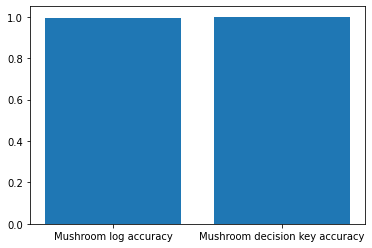

In [ ]:
plt.bar(x = ["Mushroom log accuracy", "Mushroom decision key accuracy"], height = [logic, decision])